# 马尔科夫链介绍及基于Python的蒙特卡洛仿真

# 0. 前言


# 0.1 马尔可夫性

简而言之，所谓马尔可夫性(Markov Property)是指系统的下一个状态$s_{t+1}$仅与当前状态$s_t$有关，而与以前的状态无关。

马尔可夫性的一个更通俗的说法是无记忆性(memorylessness)，即系统不记得当前状态以前的状态，仅仅基于当前状态来决定下一个时刻转移到什么状态。

# 0.2 马尔科夫链

马尔可夫链（Markov Chain, MC）是具有马尔可夫性（Markov property）的随机过程（stochastic process）,又称马尔可夫(随机)过程。

如果指标集(index set)是连续的，则称为连续时间马尔可夫链（Continuous-Time MC, CTMC）；如果指标集是离散的，则称为离散时间马尔可夫链（Discrete-Time MC, DTMC）。注意，这里‘时间’应该以广义的方式理解。时间是指标(index)的一种，但是的确是最常用的一种。因此，人们通常以时间作为广义的index的代名词。

通常情况下，我们碰到的都是DTMC，并且常常就简称为马尔科夫链。所以，当没有特别指明的情况，说起马尔科夫链的话通常就是指DTMC。

马尔可夫链可通过转移矩阵和转移图定义，除马尔可夫性外，马尔可夫链可能具有不可约性、常返性、周期性和遍历性。一个不可约和正常返的马尔可夫链是严格平稳的马尔可夫链，拥有唯一的平稳分布。遍历马尔可夫链（ergodic MC）的极限分布收敛于其平稳分布。

## 0.3 马尔科夫链有什么用？

马尔可夫链可被应用于蒙特卡罗方法中，形成马尔可夫链蒙特卡罗（Markov Chain Monte Carlo, MCMC），也被用于经济学、博弈论、通信理论、金融、动力系统、化学反应、排队论、市场行为和信息检索的数学建模。此外作为结构最简单的马尔可夫模型（Markov model），一些机器学习算法，例如隐马尔可夫模型（Hidden Markov Model, HMM）、马尔可夫随机场（Markov Random Field, MRF）和马尔可夫决策过程（Markov decision process, MDP）以马尔可夫链为理论基础。

Markov Chains have prolific usage in mathematics. They are widely employed in economics, game theory, communication theory, genetics and finance. They arise broadly in statistical specially Bayesian statistics and information-theoretical contexts. When it comes real-world problems, they are used to postulate solutions to study cruise control systems in motor vehicles, queues or lines of customers arriving at an airport, exchange rates of currencies, etc. The algorithm known as PageRank, which was originally proposed for the internet search engine Google, is based on a Markov process. Reddit's Subreddit Simulator is a fully-automated subreddit that generates random submissions and comments using markov chains, so cool!

马尔可夫链的命名来自俄国数学家安德雷·马尔可夫（Андрей Андреевич Марков）以纪念其首次提出马尔可夫链和对其收敛性质所做的研究[2]。


In this tutorial, you will discover when you can use markov chains, what the Discrete Time Markov chain is. You'll also learn about the components that are needed to build a (Discrete-time) Markov chain model and some of its common properties. Next, you'll implement one such simple model with Python using its numpy and random libraries. You will also learn some of the ways to represent a Markov chain like a state diagram and transition matrix.


# 3. 离散时间马尔科夫链(DTMC)

如前所述，DTMC是指其指标为离散时间，称为time step（时间步，时刻），系统状态在每个time step随机变化。每个time step的状态相当于一个随机变量。因此DTMC可以看作是一个离散随机变量序列。当然，把time step换成任意其它的离散指标，比如说距离啊什么，也完全可以。总之，把离散时间广义地理解为离散指标就没有错。

记时刻t的状态随机变量为$X_t \in \mathscr{S}$，后者称为该马尔科夫链的状态空间，状态空间可以为任意事物，比如说，字母、数字、篮球比赛计分、天气状况等等。对于DTMC，虽然指标(时间)为离散的，但是对于状态空间没有什么离散或者连续的约束。当然需要实际应用中的DTMC都采用有限的或者可数的状态空间，因为这样更容易进行统计分析。

从时刻t的状态$X_t$转移到时刻(t+1)的状态$X_{t+1}$遵循一定的概率规则，再加上马尔科夫性的约束，这个概率性的状态转移关系可以表示为：

$$Pr(X_{t+1}=x | X_1=x_1,X_2=x_2,...,X_t=x_t) = Pr(X_{t+1}=x | X_t=x_t)$$

如上所示，系统不记得当前状态以前的状态，仅仅基于当前状态来决定下一个时刻转移到什么状态。


# 4. 马尔科夫链建模

马尔科夫链的模型由一个状态空间和一个状态转移矩阵，以及一个初始状态分布完全刻画。


## 4.1 转移概率矩阵

一个马尔科夫链可以用一个概率性自动机(probabilistic automaton)来表示。状态之间转移的概率称为转移概率(transition probabilities),在状态空间有限或者可数的条件，所有各状态两两之间的转移概率可以用转移概率矩阵(transition probability matrix)表示。考虑系统有N个状态，则转移概率矩阵为$N \multiply N$方阵，如下所示：

$$
  P_{n\times n} =
  \left[ {\begin{array}{cccc}
    p_{11} & p_{12} & \cdots & p_{1n}\\
    p_{21} & p_{22} & \cdots & p_{2n}\\
    \vdots & \vdots & \ddots & \vdots\\
    p_{n1} & p_{n2} & \cdots & p_{nn}\\
  \end{array} } \right]
$$

其中$p_{i,j}$表示从状态i向状态j转移的概率。很显然，转移概率矩阵是一个右随机矩阵(stochastic matrix),它的每一行的和为1，因为每一行就表示某个状态的概率分布（向包括它自己在内的所有各状态转移的概率）.

当然，转移概率矩阵有时候也以表格的方式表达。


## 4.2 有向图表示

马尔科夫链的状态转移也可以用一个有向图(directed graph)来表示。其中的节点表示状态，边(edge)的箭头方向表示状态转移的方向，而edge上的数值则表示对应状态转移的概率。参见下面的例子。


## 4.3 一个实例


假定小A每天功课虽然很紧张，但是每天下午有一个放松时段，她有三个选择：要么出去跑步，要么吃冰淇淋，要么睡一觉。

从历史数据来看，如果某一天小A在放松时段睡了一觉的话，那么第二天她有60%的概率会去跑步，有20%的概率会选择睡觉，还有20%的概率选择吃冰淇淋。

如果某一天小A在放松时段跑步的话，那么第二天她仍有60%的概率会去跑步，有10%的概率会选择睡觉，还有30%的概率选择吃冰淇淋。

如果某一天小A在放松时段是吃冰淇淋的话，那么第二天她仍有10%的概率会选择吃冰淇淋，有70%的概率去跑步，有20%的概率会选择睡觉。

小A的每天在下午放松时段的选择其实就构成一个马尔科夫链，可以用有向图表示如下，这个图通常称为状态转移图(state transition diagram)：

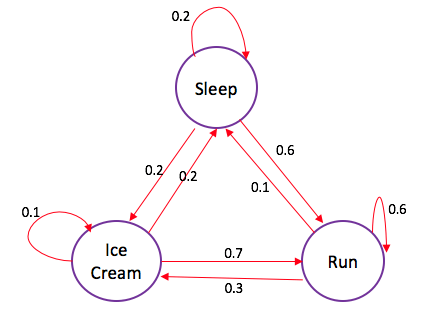

而概率转移矩阵以表格的方式表示的话如下所示：

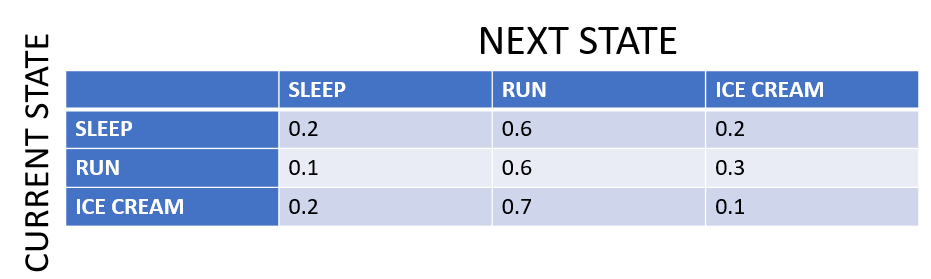


接下来的问题是，我们用了这么花哨的方式来表示这么个事情，有什么用呢？的确会有一些用。虽然在我们这个简单的例子中，看起来有点金弹子打鸟了。

比如说，在以上这个例子中，基于马尔科夫链的理论，你现在可以回答这样的问题：

假定已知小A今天选择了跑步，在两天后（即后天）小A会去跑步的概率有多大？让我们来手动计算一下（手动计算永远都是彻底理解一个概念的必要步骤）。

因为小A今天选择了跑步，到达后天小A选择跑步的状态转移的路径一共有三条，如下图所示。这个图是将状态转移图随着time step展开而得，称为trellis diagram. 这三条路径分别为：(1) RUN-->RUN-->RUN; (2) RUN-->ICECREAM-->RUN; (3) RUN-->SLEEP-->RUN. 根据条件概率我们可以得到：

$$Pr(后天=RUN | 明天=RUN, 今天=RUN) = Pr(后天=RUN | 明天=RUN) \cdot Pr(明天=RUN | 今天=RUN) = 0.6*0.6 = 0.36$$

$$Pr(后天=RUN | 明天=ICECREAM, 今天=RUN) = Pr(后天=RUN | 明天=ICECREAM) \cdot Pr(明天=ICECREAM | 今天=RUN) = 0.3*0.7 = 0.21$$

$$Pr(后天=RUN | 明天=SLEEP, 今天=RUN) = Pr(后天=RUN | 明天=SLEEP) \cdot Pr(明天=SLEEP | 今天=RUN) = 0.1*0.6 = 0.06$$

因此，我们可以得到：$$Pr(后天=RUN | 今天=RUN) \\= Pr(后天=RUN | 明天=RUN, 今天=RUN) + Pr(后天=RUN | 明天=RUN, 今天=RUN) + Pr(后天=RUN | 明天=RUN, 今天=RUN) \\= 0.36+0.21+0.06 = 0.63$$

因此，我们得出，如果今天小A选择了跑步的话，那么在后天她仍然有63%的概率会选择跑步。同理，我们在已知今天小A的选择的前提条件下，可以推算在其后任意一天小A的任意选择的概率。当然，如果以以上这种方式计算的话会显得非常繁琐且容易出错。幸好数学家们给我们准备了强有力的矩阵运算工具。

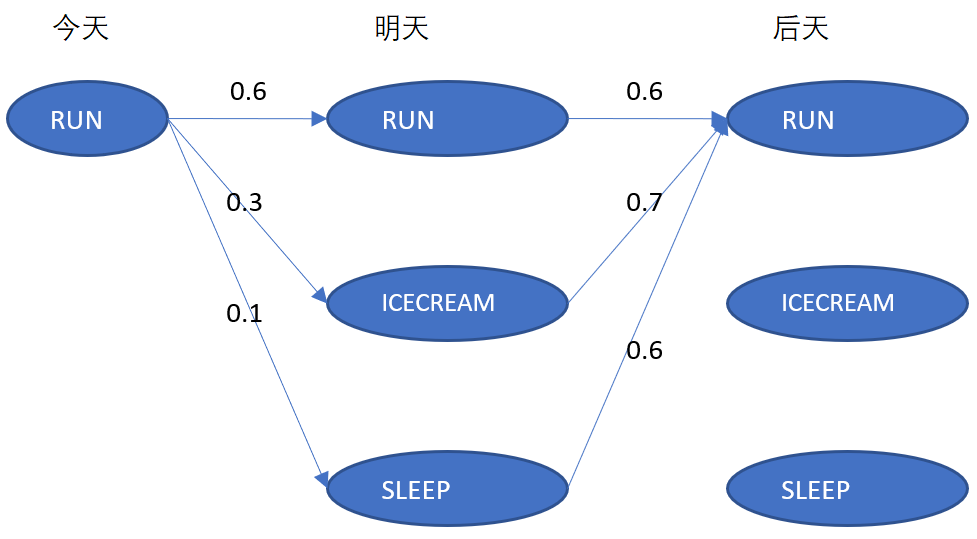

## 4.4 矩阵运算例

由于今天小A选择了RUN，所以今天的状态可以用向量表示为(参考上面的转移表，第一行表示SLEEP, 第二行表示RUN, 第三行表示ICECREAM)：$$S_0 = [s_{00}, s_{01}, s_{02}]^T = [0, 1, 0]^T$$

注意，T放在左上标表示转置，下面我们用P表示转置矩阵。

明天的状态向量可以由状态转移矩阵的转置左乘今天的状态向量运算而得，如下所示(我们状态向量是列向量，要注意以下矩阵运算中的形状匹配)：

$$
  S_1 = \left[ {\begin{array}{c}
    s_{11}\\
    s_{12}\\
    s_{13}\\
  \end{array} } \right] = 
  \left[ {\begin{array}{ccc}
    p_{11} & p_{12} & p_{13}\\
    p_{21} & p_{22} & p_{23}\\
    p_{31} & p_{32} & p_{33}\\
  \end{array} } \right]^T \cdot \left[ {\begin{array}{c} s_{01} \\ s_{02} \\ s_{03}\\ \end{array} } \right]
   = P^T \cdot S_0
$$

同理，我们可得，后天的状态向量可以如下计算而得：

$$S_2 = P^T \cdot S_1 = (P^T)^2 \cdot S_0$$

将转移概率矩阵和今天的初始向量代入则可以得到后天的状态向量为：

$$
  S_2 = 
  \left[ {\begin{array}{ccc}
    0.2 & 0.6 & 0.2\\
    0.1 & 0.6 & 0.3\\
    0.2 & 0.7 & 0.1\\
  \end{array} } \right]^2 \cdot \left[ {\begin{array}{c}
    0\\
    1\\
    0\\
  \end{array} } \right]
$$

看上去这个运算比上面的手算还要可怕得多，是不是？如果继续手动计算的话，确实，这样用矩阵的方式计算未必有什么好处。幸运的是，计算机程序非常擅长于这种矩阵运算。比如说，上面的这个计算我们可以调用python中专司矩阵运算的numpy库用以下一小段代码来实现（注意，矩阵的乘法用@，而不是*!）.

由计算结果可得，S2的第2个元素值为0.63，它就是表示在后天小A选择RUN的概率，与上面手算的结果一致。这个运算还顺便把后天选择ICECRAM和SLEEP的概率也一并计算了！当我们要进行更多的计算，甚至进行理论的推演时，矩阵形式的运算就不仅仅是提高效率，而是必须的了。

注意，以上由于我们把状态转移概率矩阵表达成右随机矩阵（即每行之和为1），所以运算中要使用它的转置。事实上我们也可以一开始就将状态转移概率矩阵表达成左随机矩阵（即每列之和为1），这样的话，就不必用转置符号了.但是这些都只是表达形式的细节差异而已，只是convention的问题，只要保持前后一致即可。

本节我们只是用python numpy小试牛刀地做了个马尔科夫链的状态变化的计算，下一章我们将基于python做一个完整的马尔科夫链的实现例，并基于程序实验探索马尔科夫链的更多性质。

In [17]:
import numpy as np

P = np.array([[0.2,0.6,0.2],[0.1,0.6,0.3],[0.2,0.7,0.1]])
S0 = np.array([[0],[1],[0]])
S2 = P.T@P.T@S0
S2

array([[0.14],
       [0.63],
       [0.23]])


Also, with this clear in mind, it becomes easier to understand some important properties of Markov chains:

Reducibility: a Markov chain is said to be irreducible if it is possible to get to any state from any state. In other words, a Markov chain is irreducible if there exists a chain of steps between any two states that has positive probability.
Periodicity: a state in a Markov chain is periodic if the chain can return to the state only at multiples of some integer larger than 1. Thus, starting in state 'i', the chain can return to 'i' only at multiples of the period 'k', and k is the largest such integer. State 'i' is aperiodic if k = 1 and periodic if k > 1.
Transience and Recurrence: A state 'i' is said to be transient if, given that we start in state 'i', there is a non-zero probability that we will never return to 'i'. State i is recurrent (or persistent) if it is not transient. A recurrent state is known as positive recurrent if it is expected to return within a finite number of steps and null recurrent otherwise.
Ergodicity: a state 'i' is said to be ergodic if it is aperiodic and positive recurrent. If all states in an irreducible Markov chain are ergodic, then the chain is said to be ergodic.
Absorbing State: a state i is called absorbing if it is impossible to leave this state. Therefore, the state 'i' is absorbing if pii = 1 and pij = 0 for i ≠ j. If every state can reach an absorbing state, then the Markov chain is an absorbing Markov chain.
Tip: if you want to also see a visual explanation of Markov chains, make sure to visit this page.

# 5. 马尔科夫链蒙特卡洛仿真

虽然已经有很多非常棒的开源马尔可夫链实现库，所以如果你是在做一个开发项目的话那你应该去选择一个好用的开源库。但是，自己动手代码实现毫无疑问是你获得对马尔科夫链的直观理解的必要的一个步骤。

In [18]:
import numpy as np
import random as rm

首先，定义状态states以及他们的转移概率矩阵。由于我们有3个状态，所以状态转移矩阵transitionMatrix为3乘以3的方阵。transitionName表示状态转移路径，对应于状态转移图中的有向edge，比如说，SS表示从SLEEP状态到SLEEP状态的转移，IR表示从ICECREAM到RUN的转移。

最后一条语句用于检查transitionMatrix是否是一个有效的状态转移矩阵（右随机矩阵，各行之和等于1）

In [20]:
# The statespace
states = ["Sleep","Icecream","Run"]

# Possible sequences of events
transitionName = [["SS","SR","SI"],["RS","RR","RI"],["IS","IR","II"]]

# Probabilities matrix (transition matrix)
transitionMatrix = [[0.2,0.6,0.2],[0.1,0.6,0.3],[0.2,0.7,0.1]]

# make sure the probabilities sum up to 1.
if sum(transitionMatrix[0])+sum(transitionMatrix[1])+sum(transitionMatrix[1]) != 3:
    print("Somewhere, something went wrong. Transition matrix, perhaps?")
else: print("All is gonna be okay, you should move on!! ;)")

All is gonna be okay, you should move on!! ;)


以下我们定义一个函数，用于从指定的初始状态，经过指定的若干天，计算某一个可能的状态转移序列，并相应地给出它所对应的概率。在以下实现中，在每一步（每一天），基于今天的状态(今天所选择的activity)以及状态转移概率矩阵通过随机采样的方式决定明天的选择。这个随机采样是通过调用np.random.choice()函数来实现的，该函数第一个参数指定可选择项列表，第三个参数指定对应各个选项的选择概率。

这个函数其实就是对我们所定义的马尔科夫链的蒙特卡洛仿真的一个engine。


In [49]:
# A function that implements the Markov model to forecast the state/mood.
def activity_sequence_forecast(activityToday, days):
    #print("Start state: " + activityToday)
    # Shall store the sequence of states taken. So, this only has the starting state for now.
    activityList = [activityToday]
    i = 0
    # To calculate the probability of the activityList
    prob = 1
    while i != days:
        if activityToday == "Sleep":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "SS":
                prob = prob * transitionMatrix[0][0]
                activityList.append("Sleep")
                pass
            elif change == "SR":
                prob = prob * transitionMatrix[0][1]
                activityToday = "Run"
                activityList.append("Run")
            else:
                prob = prob * transitionMatrix[0][2]
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Run":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "RR":
                prob = prob * transitionMatrix[1][1]
                activityList.append("Run")
                pass
            elif change == "RS":
                prob = prob * transitionMatrix[1][0]
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * transitionMatrix[1][2]
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Icecream":
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            if change == "II":
                prob = prob * transitionMatrix[2][2]
                activityList.append("Icecream")
                pass
            elif change == "IS":
                prob = prob * transitionMatrix[2][0]
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * transitionMatrix[0][1]
                activityToday = "Run"
                activityList.append("Run")
        i += 1  
    return activityList, prob

In [46]:
# First trial simulation.
# 由于是蒙特卡洛仿真，每次调用函数所返回的结果并不是确定性的。
startState = "Run"
activityList, prob = activity_sequence_forecast(startState,2)
print("One possible state transition sequence: {0}, with probability = {1:2.2f}".format(str(activityList),prob))
activityList, prob = activity_sequence_forecast(startState,2)
print("One possible state transition sequence: {0}, with probability = {1:2.2f}".format(str(activityList),prob))
activityList, prob = activity_sequence_forecast(startState,2)
print("One possible state transition sequence: {0}, with probability = {1:2.2f}".format(str(activityList),prob))
activityList, prob = activity_sequence_forecast(startState,2)
print("One possible state transition sequence: {0}, with probability = {1:2.2f}".format(str(activityList),prob))

One possible state transition sequence: ['Run', 'Run', 'Sleep'], with probability = 0.06
One possible state transition sequence: ['Run', 'Sleep', 'Run'], with probability = 0.06
One possible state transition sequence: ['Run', 'Icecream', 'Sleep'], with probability = 0.06
One possible state transition sequence: ['Run', 'Run', 'Icecream'], with probability = 0.18


如上所示，以上每次调用产生一个可能的序列及其相应的概率，并没有直接给出比如说从今天的RUN出发两天后选择RUN的概率。但是通过调用足够多次然后进行统计就可以得到一个足够好的统计近似值，其中，每次调用相当于是一次采样。

In [52]:
# To save every activityList
list_activity = []

# iterate for many times to perform the sampling
for iterations in range(1,10000):
    initState = np.random.choice(states,replace=True,p=[1/3,1/3,1/3]) # Select the init state with equal probability
    list_activity.append(activity_sequence_forecast(initState,2))

# Check out all the `activityList` we collected    
#print(list_activity)

# Iterate through the list to get a count of all activities ending in state:'Run'
cnt_start_from_RUN = 0
cnt_start_from_RUN_and_end_at_RUN= 0
for (activityList, prob) in list_activity:
    if activityList[0] == "Run":
        cnt_start_from_RUN += 1
        if activityList[2] == "Run":
            cnt_start_from_RUN_and_end_at_RUN += 1

# Calculate the probability of starting from state:'Sleep' and ending at state:'Run'
percentage = (cnt_start_from_RUN_and_end_at_RUN/cnt_start_from_RUN) * 100
print("The probability of starting at state:'Run' and ending at state:'Run'= " + str(percentage) + "%")

The probability of starting at state:'Run' and ending at state:'Run'= 63.175074183976264%


基于蒙特卡洛仿真我们得到从RUN出发经过2步（天）到达RUN状态的概率约为63%，与上一章我们的理论推算值基本一致。如果仿真的次数继续增加，仿真估计值与真实值的差异会进一步减小。这是大数定律发挥威力的地方。

当然，以上仿真中事实上不仅仅计算了从RUN出发经过2步（天）到达RUN状态的概率，而是从任意状态S0出发经过2天到达任意状态S2的概率。进一步，我们可以把步数也参数，这样我们就可以通过蒙特卡洛仿真得出“从任意状态S0出发经过K天到达任意状态Sk”的概率。在此基础上我们还可以做更多的有趣的实验。这些就留给感兴趣的小伙伴自行实验。


Reference

[1] https://www.datacamp.com/community/tutorials/markov-chains-python-tutorial

[2] https://baike.baidu.com/item/%E9%A9%AC%E5%B0%94%E5%8F%AF%E5%A4%AB%E9%93%BE/6171383